In [17]:
from pyspark.sql import SparkSession

In [4]:
spark = SparkSession.builder.master('local').appName('Test_Spark').getOrCreate()

In [83]:
### Check if Apache Spark is working or not
spark

In [50]:
# Read the dataset
df_pyspark = spark.read.csv('Salary_Data.csv', header=True, inferSchema=True)

In [51]:
df_pyspark.dtypes

[('YearsExperience', 'double'), ('Age', 'double'), ('Salary', 'int')]

In [52]:
df_pyspark.show()

+---------------+----+------+
|YearsExperience| Age|Salary|
+---------------+----+------+
|            1.1|21.0| 39343|
|            1.3|21.5| 46205|
|            1.5|21.7| 37731|
|            2.0|22.0| 43525|
|            2.2|22.2| 39891|
|            2.9|23.0| 56642|
|            3.0|23.0| 60150|
|            3.2|23.3| 54445|
|            3.2|23.3| 64445|
|            3.7|23.6| 57189|
|            3.9|23.9| 63218|
|            4.0|24.0| 55794|
|            4.0|24.0| 56957|
|            4.1|24.0| 57081|
|            4.5|25.0| 61111|
|            4.9|25.0| 67938|
|            5.1|26.0| 66029|
|            5.3|27.0| 83088|
|            5.9|28.0| 81363|
|            6.0|29.0| 93940|
+---------------+----+------+
only showing top 20 rows



In [53]:
from pyspark.ml.feature import VectorAssembler

featureAssembler = VectorAssembler(inputCols=['Age', 'YearsExperience'], outputCol='Independent_Features')

In [54]:
output = featureAssembler.transform(df_pyspark);

In [55]:
output.show()

+---------------+----+------+--------------------+
|YearsExperience| Age|Salary|Independent_Features|
+---------------+----+------+--------------------+
|            1.1|21.0| 39343|          [21.0,1.1]|
|            1.3|21.5| 46205|          [21.5,1.3]|
|            1.5|21.7| 37731|          [21.7,1.5]|
|            2.0|22.0| 43525|          [22.0,2.0]|
|            2.2|22.2| 39891|          [22.2,2.2]|
|            2.9|23.0| 56642|          [23.0,2.9]|
|            3.0|23.0| 60150|          [23.0,3.0]|
|            3.2|23.3| 54445|          [23.3,3.2]|
|            3.2|23.3| 64445|          [23.3,3.2]|
|            3.7|23.6| 57189|          [23.6,3.7]|
|            3.9|23.9| 63218|          [23.9,3.9]|
|            4.0|24.0| 55794|          [24.0,4.0]|
|            4.0|24.0| 56957|          [24.0,4.0]|
|            4.1|24.0| 57081|          [24.0,4.1]|
|            4.5|25.0| 61111|          [25.0,4.5]|
|            4.9|25.0| 67938|          [25.0,4.9]|
|            5.1|26.0| 66029|  

In [56]:
finalData = output.select('Independent_Features', 'Salary')

In [57]:
finalData.show()

+--------------------+------+
|Independent_Features|Salary|
+--------------------+------+
|          [21.0,1.1]| 39343|
|          [21.5,1.3]| 46205|
|          [21.7,1.5]| 37731|
|          [22.0,2.0]| 43525|
|          [22.2,2.2]| 39891|
|          [23.0,2.9]| 56642|
|          [23.0,3.0]| 60150|
|          [23.3,3.2]| 54445|
|          [23.3,3.2]| 64445|
|          [23.6,3.7]| 57189|
|          [23.9,3.9]| 63218|
|          [24.0,4.0]| 55794|
|          [24.0,4.0]| 56957|
|          [24.0,4.1]| 57081|
|          [25.0,4.5]| 61111|
|          [25.0,4.9]| 67938|
|          [26.0,5.1]| 66029|
|          [27.0,5.3]| 83088|
|          [28.0,5.9]| 81363|
|          [29.0,6.0]| 93940|
+--------------------+------+
only showing top 20 rows



In [66]:
from pyspark.ml.regression import LinearRegression

In [67]:
### Training Data = 75% and Testing Data = 25%
trainingData, testingData = finalData.randomSplit([0.75, 0.25])

In [68]:
trainingData, testingData = finalData.randomSplit([0.75, 0.25])

### labelCol is the output column
regressor = LinearRegression(featuresCol='Independent_Features', labelCol='Salary')
regressor = regressor.fit(trainingData)

In [69]:
### Coefficients of the regressor
regressor.coefficients

DenseVector([1261.3458, 7438.0712])

In [70]:
### Intercepts of the regressor
regressor.intercept

3220.6568348762585

In [71]:
### Predict the results
predictedResults = regressor.evaluate(testingData)

In [72]:
predictedResults.predictions.show()

+--------------------+------+------------------+
|Independent_Features|Salary|        prediction|
+--------------------+------+------------------+
|          [21.0,1.1]| 39343| 37890.79680295329|
|          [21.5,1.3]| 46205| 40009.08394747862|
|          [22.0,2.0]| 43525|45846.406715427715|
|          [22.2,2.2]| 39891| 47586.29012285955|
|          [23.3,3.2]| 54445| 56411.84173904989|
|          [23.3,3.2]| 64445| 56411.84173904989|
|          [24.0,4.0]| 56957|63245.240789746065|
|          [24.0,4.1]| 57081| 63989.04791443081|
|          [26.0,5.1]| 66029| 73949.81074190163|
|          [31.0,7.9]|101302|101083.13918463296|
|          [34.0,9.0]|105582|113049.05492710021|
|         [38.0,10.5]|121872| 129251.5449586181|
+--------------------+------+------------------+



C:\Users\Sam\anaconda3\lib\site-packages\pyspark\sql\context.py:125: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


In [73]:
### Find the errors
print('Mean Absolute Error', predictedResults.meanAbsoluteError)
print('Mean Squared Error', predictedResults.meanSquaredError)

Mean Absolute Error 5320.614686251601
Mean Squared Error 36147468.44206502


In [65]:
import matplotlib.pyplot as plt

In [74]:
linearRegressionPrediction = regressor.transform(testingData).select('Salary', 'prediction')

In [76]:
### Converting the PySpark dataframe to a Pandas dataframe
lrPredictionDF = linearRegressionPrediction.toPandas().sort_values('S')

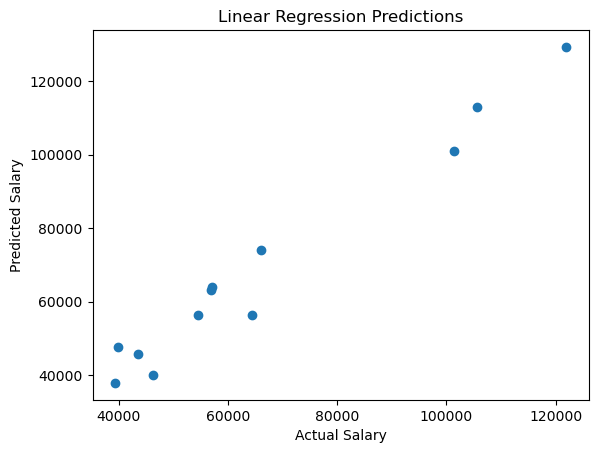

In [82]:
# Plot the actual vs predicted values as a scatter plot
plt.scatter(lrPredictionDF['Salary'], lrPredictionDF['prediction'])
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.title('Linear Regression Predictions')
plt.show()